In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
import numpy as np

x = np.ones(197)
xPrevious = np.ones(22)

rescaledxPrevious = np.linspace(len(xPrevious), len(x))
print(rescaledxPrevious)

[ 22.          25.57142857  29.14285714  32.71428571  36.28571429
  39.85714286  43.42857143  47.          50.57142857  54.14285714
  57.71428571  61.28571429  64.85714286  68.42857143  72.
  75.57142857  79.14285714  82.71428571  86.28571429  89.85714286
  93.42857143  97.         100.57142857 104.14285714 107.71428571
 111.28571429 114.85714286 118.42857143 122.         125.57142857
 129.14285714 132.71428571 136.28571429 139.85714286 143.42857143
 147.         150.57142857 154.14285714 157.71428571 161.28571429
 164.85714286 168.42857143 172.         175.57142857 179.14285714
 182.71428571 186.28571429 189.85714286 193.42857143 197.        ]


In [3]:
fault9 = pd.read_csv('F9.csv')
fault9.head()

,Profile,Depth/ms,Heave/m,Throw/ms,Depth/m
0,1,2696.99,12.59550,8.54209,2347.659673
1,1,2707.20,15.05780,6.53441,2355.600960
2,1,2714.12,16.28900,7.80341,2361.042571
3,1,2724.21,9.41079,8.89719,2369.062759
4,1,2730.50,10.42430,10.39880,2374.113975


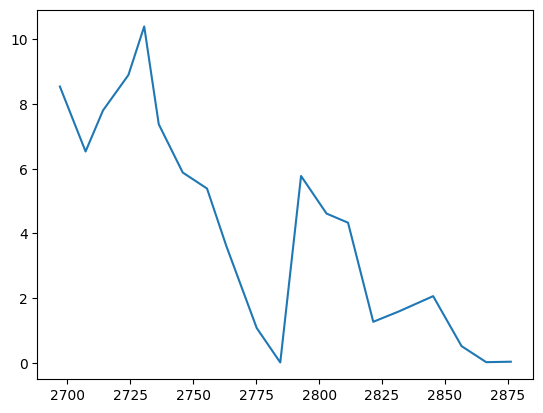

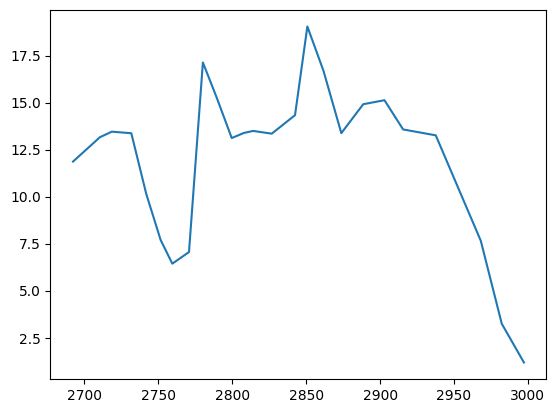

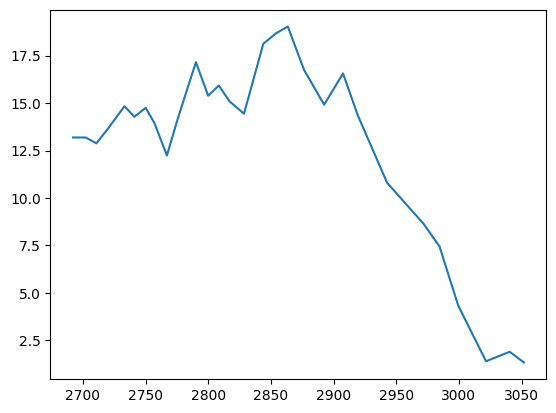

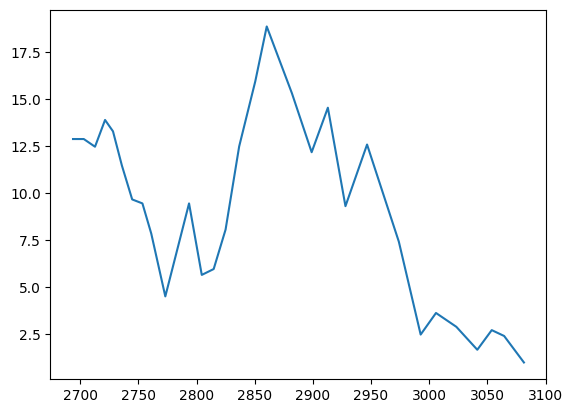

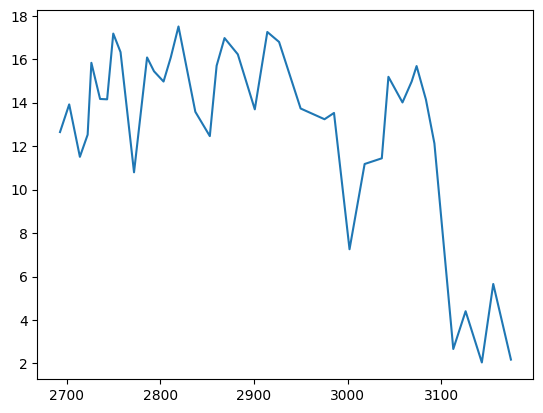

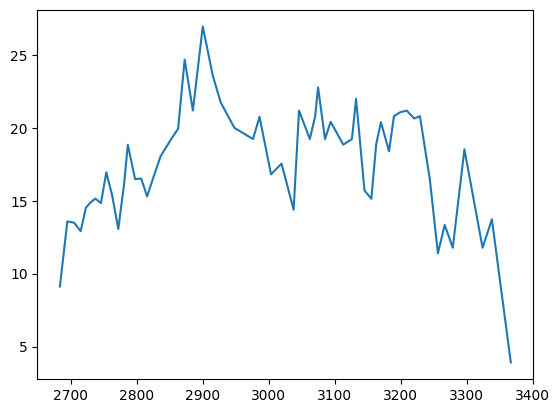

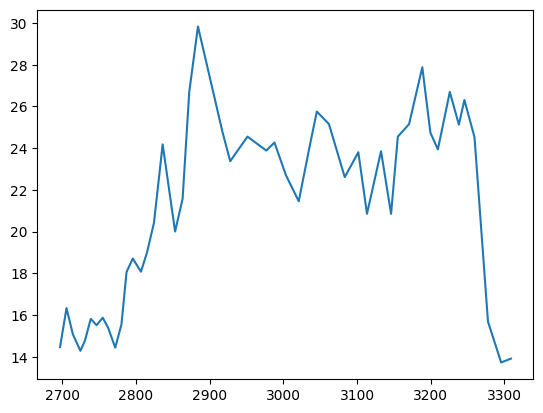

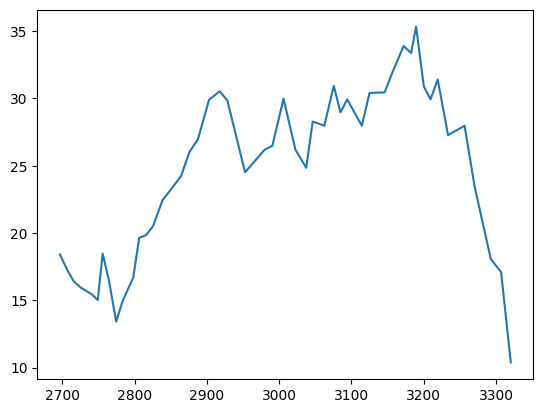

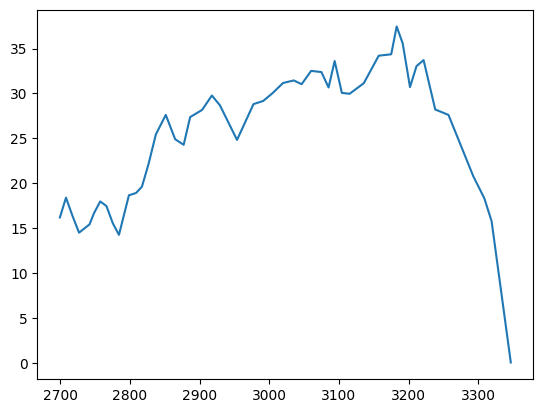

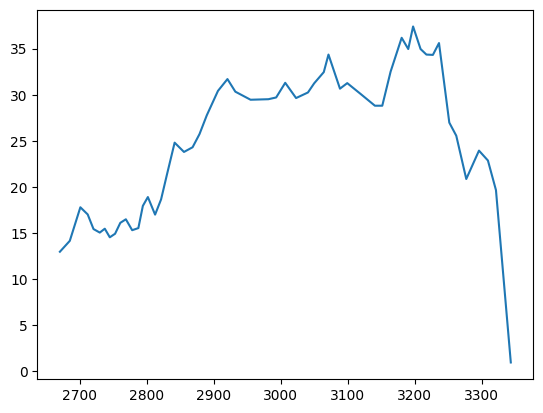

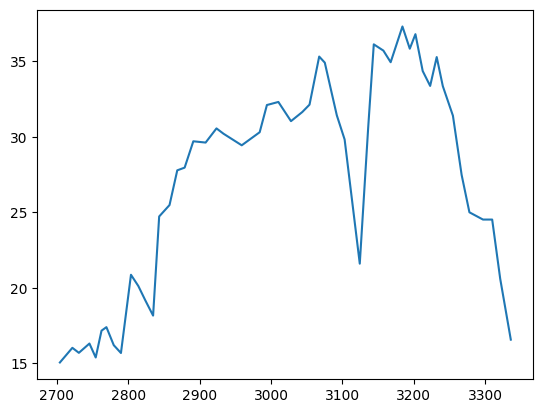

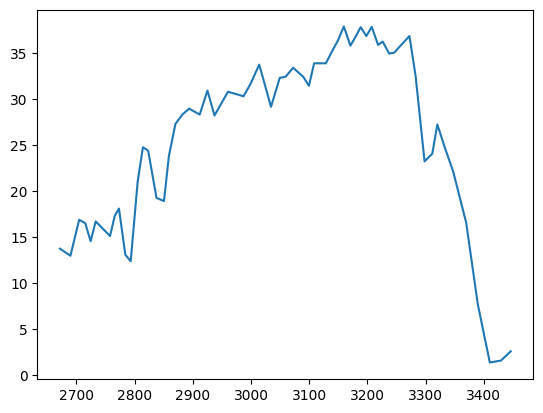

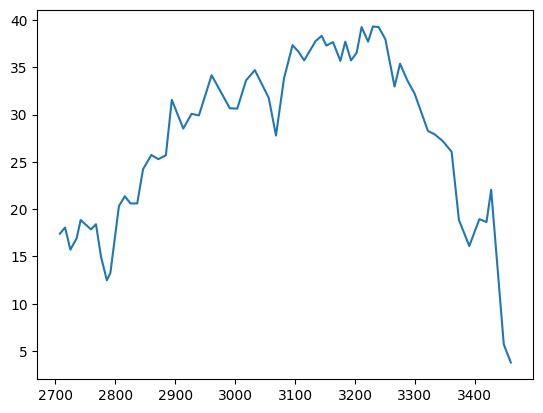

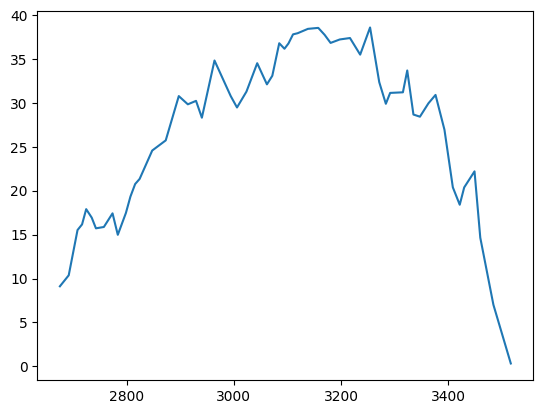

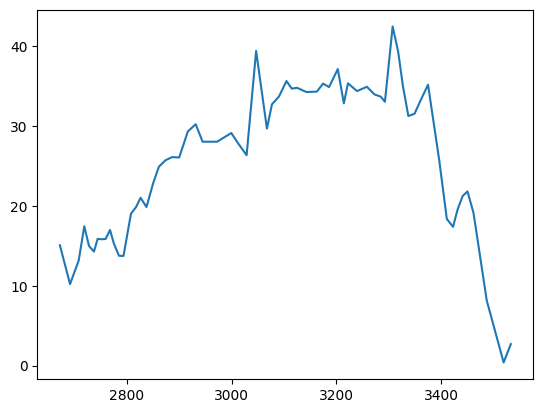

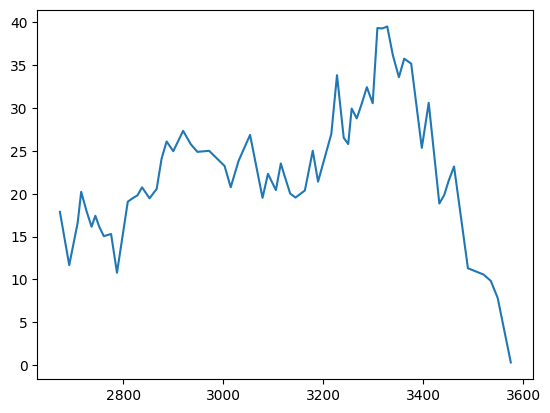

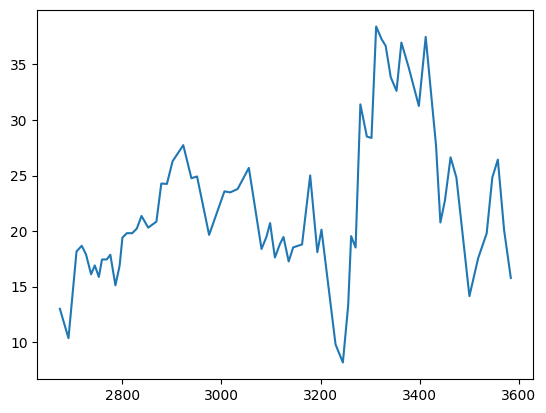

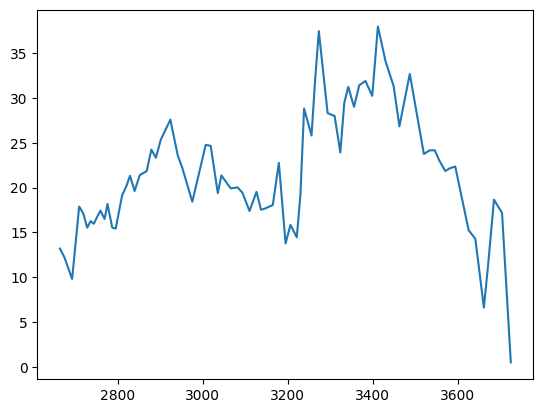

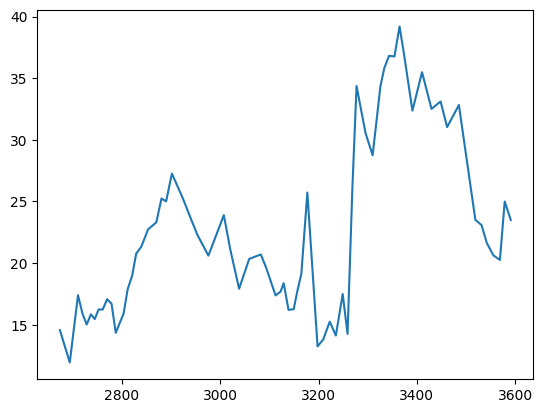

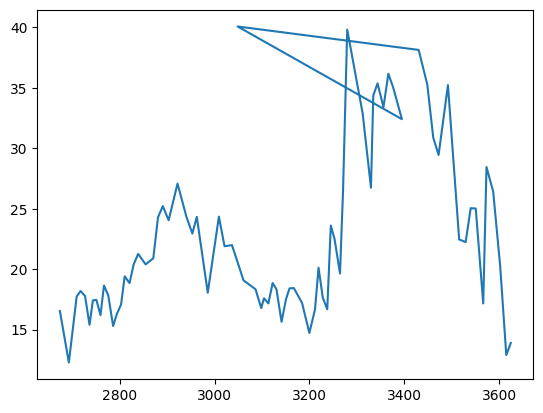

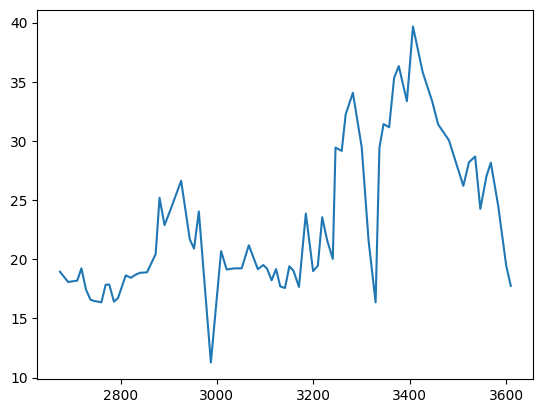

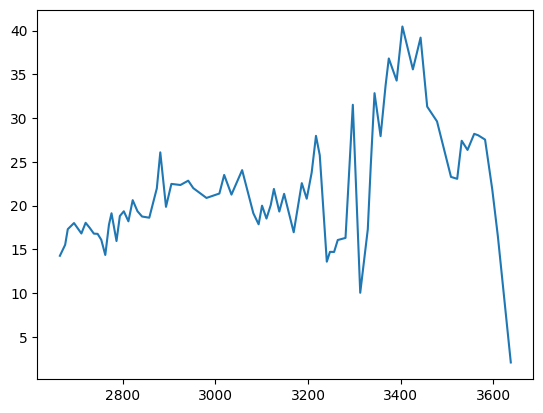

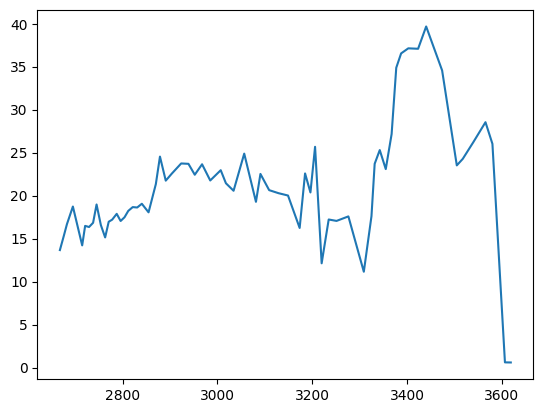

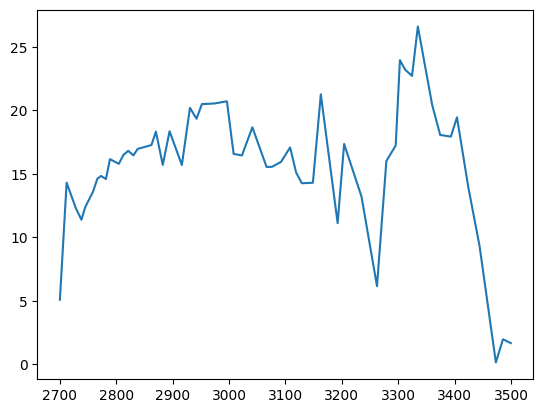

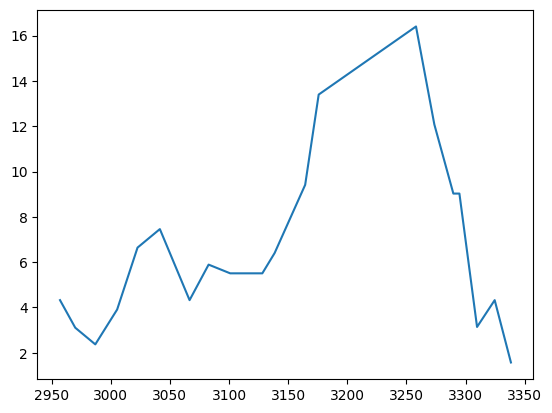

In [4]:
for profile in fault9['Profile'].unique():
    plt.plot(fault9[fault9['Profile'] == profile]['Depth/ms'],fault9[fault9['Profile'] == profile]['Throw/ms'])
    plt.show()

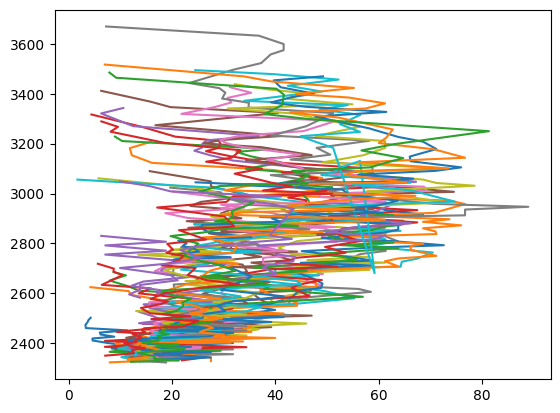

In [5]:
for profile in fault9['Profile'].unique():
    plt.plot(fault9[fault9['Profile'] == profile]['Heave/m'],fault9[fault9['Profile'] == profile]['Depth/m'])
plt.show()

-6.199789558168316 34.8538882694681 12.287472594299732


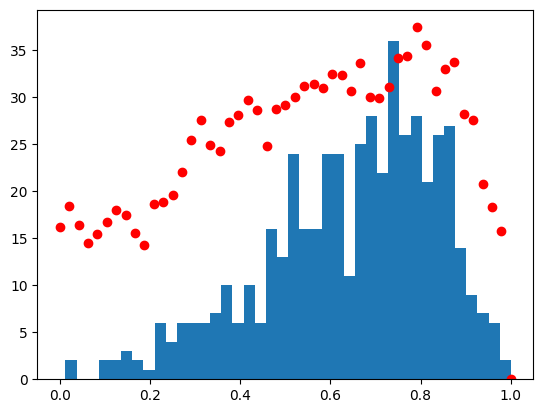

In [6]:
sample = stats.skewnorm(1.3, -0.1, 2.2).rvs(1000)

real_sample = list(fault9[fault9['Profile']==9]['Throw/ms'])

a, loc, scale = stats.skewnorm.fit(real_sample)

print(a, loc, scale)

sim = stats.skewnorm(a, loc, scale).rvs(500)
simnorm = sim/np.max(sim)

real_sample_norm = real_sample/np.max(real_sample)
plt.hist(simnorm, bins=40)
plt.scatter(np.linspace(start=0,stop=1, num=len(real_sample)),real_sample, color='red')

In [7]:
f22c1 = pd.read_csv('F22C1.csv')

In [8]:
kf6 = pd.read_csv('KeystoneF6.csv')
kf6.head()

,Profile,Depth/ms,Heave/m,Throw/ms,Depth/m
0,1,3162.87,0.0000,0.000,2816.162577
1,1,3174.06,23.5130,1.844,2830.084784
2,1,3184.15,34.3120,3.002,2842.745766
3,1,3194.29,43.1510,4.176,2855.572055
4,1,3209.16,52.0978,4.282,2874.567365


In [9]:
step = 1
startPoint = 2
endPoint = startPoint+step

yStart = kf6.iloc[startPoint,3]
yEnd = kf6.iloc[endPoint,3]


xStart = kf6.iloc[startPoint,1]
xEnd = kf6.iloc[endPoint,1]

print(xStart, xEnd, yStart, yEnd)

grad = (yEnd-yStart)/(xEnd-xStart)

print(grad)

3184.15 3194.29 3.002 4.176
0.11577909270217111


In [442]:
import pywt

def waveletGen(x,y):
    scales = np.arange(1,31)
    contWav = pywt.cwt(y, scales, 'mexh', sampling_period=0.1)
    return contWav

def normalizeThrow(x, y, contWav):
    # newSamplesDistance = np.linspace(np.min(x), np.max(x), contWav[0].shape[1])
    # newTest = np.interp(newSamplesDistance, newSamplesDistance, y)
    newTestNorm = np.asarray(y) * 0.8 * contWav[0].shape[0] / np.max(y)
    return newTestNorm

def waveletPlot(x, y, contWav):
    
    newTestNorm = normalizeThrow(x, y, contWav)

    fig, ax = plt.subplots(1, 1)
    ax.plot(np.arange(contWav[0].shape[1]), newTestNorm, color='red')
    im = ax.imshow(contWav[0], interpolation='nearest', aspect='auto', origin='lower')
    plt.colorbar(im)
    plt.yticks(np.arange(contWav[0].shape[0])[::-1],np.round(contWav[1],3))
    plt.xlabel('Distance (m or uniform measurement intervals)')
    plt.ylabel('Frequency (m$^{-1}$)')
    return None

In [11]:
print(pywt.wavelist(kind='continuous'))

['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']


BF1H2


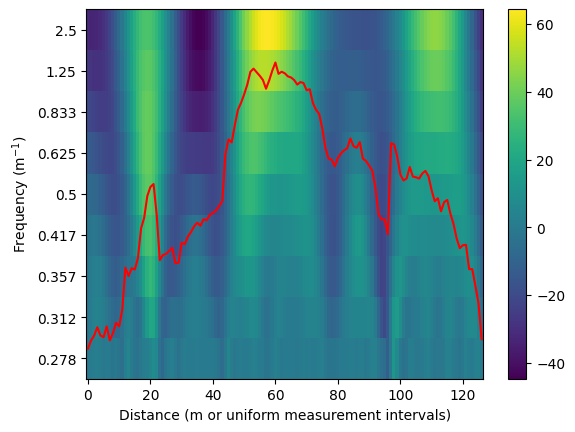

In [274]:
BF1H2 = pd.read_csv('BF1 H2.csv')

print('BF1H2')
BF1H2Wav = waveletPlot(list(BF1H2['Inline No.']), list(BF1H2['Throw']),waveletGen(list(BF1H2['Inline No.']), list(BF1H2['Throw'])))

In [18]:
data = pd.read_csv('BF1 H2.csv')

dataWav = waveletGen(list(data.iloc[:,0]), list(data.iloc[:,3]))


In [19]:
def minMaxArray(contWav):
    newArray = np.empty(contWav[0].shape)
    newArray[:] = np.nan
    for i in range(contWav[0].shape[0]):
        maxIndex = np.argmax(contWav[0][i])
        minIndex = np.argmin(contWav[0][i])
        newArray[i,maxIndex] = 1
        newArray[i,minIndex] = -1
    return newArray

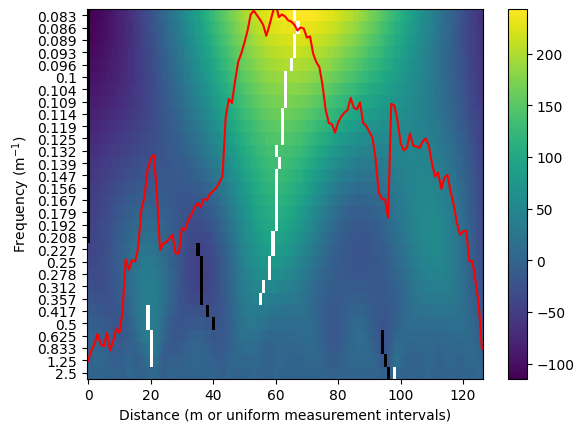

In [20]:
waveletPlot(list(data.iloc[:,0]), list(data.iloc[:,3]), dataWav)
plt.imshow(minMaxArray(dataWav), interpolation='nearest', aspect='auto', origin='lower', cmap='gray')
plt.show()

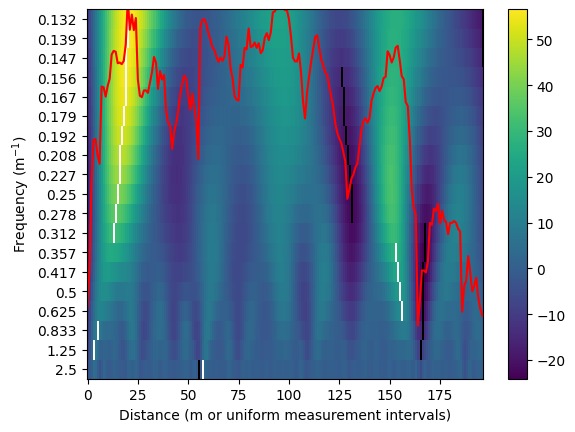

In [218]:
data = pd.read_csv('R2 H3.csv')
x = list(data.iloc[:,0])
y = list(data.iloc[:,3])
dataWav = waveletGen(x, y)
waveletPlot(x, y, dataWav)
plt.imshow(minMaxArray(dataWav), interpolation='nearest', aspect='auto', origin='lower', cmap='gray')
plt.show()

In [335]:
np.unravel_index(np.argmax(contWav[0]), contWav[0].shape)[0]

find_peaks(y)

(array([  4,   7,  13,  16,  20,  22,  24,  29,  33,  36,  38,  48,  52,
         58,  66,  69,  76,  78,  80,  83,  85,  89,  96, 105, 114, 138,
        144, 149, 154, 166, 170, 172, 174, 176, 180, 182, 189, 193],
       dtype=int64),
 {})

In [453]:
from scipy.signal import argrelextrema, find_peaks

# x = list(data.iloc[:,0])
# y = list(data.iloc[:,3])

# contWav = dataWav
def gradientDescent(y, startIdx):
    newIdx = startIdx


    while True:

        
        if newIdx >= len(y)-1:
            return newIdx
        else:
            right = -y[newIdx] + y[newIdx+1]
         
        if newIdx <= 0:
            return newIdx
        else:
            left = -y[newIdx] + y[newIdx-1]

        
        

        
        
        if left > 0 and right > 0:
            return newIdx
        elif left < 0 and right < 0:
            if left > right:
                newIdx = newIdx - 1
            else:
                newIdx = newIdx + 1
        elif left > 0 and right < 0:
            newIdx = newIdx + 1
        elif left < 0 and right > 0:
            newIdx = newIdx - 1



def firstSegment(x, y, contWav):
    minMax = minMaxArray(contWav)
    maxIndex = np.argwhere(minMax==1)
    minIndex = np.argwhere(minMax==-1)

    # find maximum in throw and the corresponding peak wavelength
    maxDist = maxIndex.T[1]
    yWavMaxInd = [y[i] for i in maxDist]
    segPeak = maxDist[np.argmax(yWavMaxInd)]
    print(contWav[1][np.argmax(yWavMaxInd)])
    # find maximum in wavelength then find nearest peak in throw
    


    firstSegFrequencyIndex = np.argmax(contWav[0][:,segPeak])
    firstSegFrequency = contWav[1][firstSegFrequencyIndex]
    firstSegFrequencyAmplitude = contWav[0][firstSegFrequencyIndex,:]

    localMinima = np.insert(np.asarray([0,len(x)-1]),1,find_peaks(np.asarray(firstSegFrequencyAmplitude) *-1)[0])
    if len(localMinima) < 2:
        print('Error: not enough frequency dips')
        return None
    firstMinimum = localMinima[(np.abs(localMinima-firstSegFrequencyIndex)).argmin()]
    if firstMinimum < segPeak:
        localMinima = [localMinima[i] for i in range(len(localMinima)) if localMinima[i] > segPeak]
        if len(localMinima) == 0:
            secondMinimum = len(x)-1
    elif firstMinimum > segPeak:
        localMinima = [localMinima[i] for i in range(len(localMinima)) if localMinima[i] < segPeak]
        if len(localMinima) == 0:
            secondMinimum = 0
    else:
        print('Error: Zero sized segment')
        return None
    if len(localMinima) == 0:
        pass
    else:
        secondMinimum = localMinima[(np.abs(localMinima-firstSegFrequencyIndex)).argmin()]
    firstMinimum = gradientDescent(y, firstMinimum)
    secondMinimum = gradientDescent(y, secondMinimum)
    lower = np.min([firstMinimum,secondMinimum])
    upper = np.max([firstMinimum,secondMinimum])
    firstMinimum = lower
    secondMinimum = upper
    return firstMinimum, segPeak, secondMinimum





In [198]:
np.insert(np.asarray([0,len(x)-1]),1, np.asarray(argrelextrema(np.asarray(y), np.less))[0])

array([  0,   6,   9,  15,  17,  21,  23,  27,  30,  35,  37,  42,  51,
        55,  65,  67,  75,  77,  79,  81,  84,  86,  90, 108, 129, 139,
       145, 151, 164, 168, 171, 173, 175, 179, 181, 186, 191, 196])

In [153]:
def nextSegment(x, y, firstMinimum, secondMinimum):
    if firstMinimum < 10:
        nextFirstMinimum1, nextPeak1, nextSecondMinimum1 = None, None, None
    else:
        newy1 = y[:firstMinimum]
        newx1 = x[:firstMinimum]
        contWav1 = waveletGen(newx1, newy1)
        nextFirstMinimum1, nextPeak1, nextSecondMinimum1 = firstSegment(newx1, newy1, contWav1)

    if secondMinimum > len(y)-11:
        nextFirstMinimum2, nextPeak2, nextSecondMinimum2 = None, None, None
    else:
        newy2 = y[secondMinimum:]
        newx2 = x[secondMinimum:]
        contWav2 = waveletGen(newx2, newy2)
        nextFirstMinimum2, nextPeak2, nextSecondMinimum2 = firstSegment(newx2, newy2, contWav2)
        nextFirstMinimum2+=secondMinimum
        nextPeak2+=secondMinimum
        nextSecondMinimum2+=secondMinimum
    return ([nextFirstMinimum1, nextPeak1, nextSecondMinimum1], [nextFirstMinimum2, nextPeak2, nextSecondMinimum2])

# x = list(data.iloc[:,0])
# y = list(data.iloc[:,3])

# firstMinimum = 0
# secondMinimum = 55

# # newy = y.copy()
# # newy = newy[0:firstMinimum] + newy[secondMinimum:]
# # newx = x[0:firstMinimum] + x[secondMinimum:]
# # contWav = waveletGen(newx, newy)

# # firstMinimum, segPeak, secondMinimum = firstSegment(newx, newy, contWav)
# firstMinimum, segPeak, secondMinimum = nextSegment(x, y, firstMinimum, secondMinimum)
# print(firstMinimum, segPeak, secondMinimum)
# waveletPlot(newx,newy,contWav)
# plt.plot([firstMinimum, segPeak, secondMinimum], [newy[firstMinimum], newy[segPeak], newy[secondMinimum]], color='black')
# plt.show()

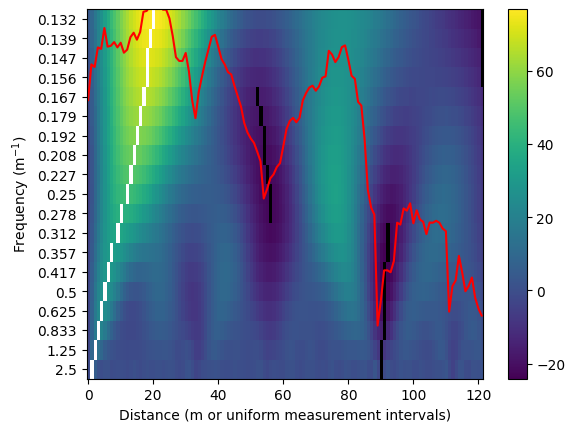

In [176]:
waveletPlot(x[75:],y[75:],waveletGen(x[75:],y[75:]))
plt.imshow(minMaxArray(waveletGen(x[75:],y[75:])), interpolation='nearest', aspect='auto', origin='lower', cmap='gray')

In [149]:
x = list(data.iloc[:,0])
y = list(data.iloc[:,3])

firstMinimum = 0
secondMinimum = 55


if firstMinimum < 10:
    nextFirstMinimum1, nextPeak1, nextSecondMinimum1 = None, None, None
else:
    newy1 = y[:firstMinimum]
    newx1 = x[:firstMinimum]
    contWav1 = waveletGen(newx1, newy1)
    nextFirstMinimum1, nextPeak1, nextSecondMinimum1 = firstSegment(newx1, newy1, contWav1)

if secondMinimum > len(y)-11:
    nextFirstMinimum2, nextPeak2, nextSecondMinimum2 = None, None, None
else:
    newy2 = y[secondMinimum:]
    newx2 = x[secondMinimum:]
    contWav2 = waveletGen(newx2, newy2)
    nextFirstMinimum2, nextPeak2, nextSecondMinimum2 = firstSegment(newx2, newy2, contWav2)
    nextFirstMinimum2+=secondMinimum
    nextPeak2+=secondMinimum
    nextSecondMinimum2+=secondMinimum

print("Part 1:\n", nextFirstMinimum1, nextPeak1, nextSecondMinimum1, "\n\nPart 2:\n", nextFirstMinimum2, nextPeak2, nextSecondMinimum2)


Part 1:
 None None None 

Part 2:
 55 58 75


In [455]:
data = pd.read_csv('R2 H3.csv')
x = list(data.iloc[:,0])
y = list(data.iloc[:,3])
contWav = waveletGen(x,y)
firstMinimum1, peak1, secondMinimum1 = firstSegment(x, y, contWav)
nextSegments1 = nextSegment(x, y, firstMinimum1, secondMinimum1)
nextSegments2 = nextSegment(x, y, 0, nextSegments1[1][2])
nextSegments3 = nextSegment(x, y, 0, nextSegments2[1][2])


# print(find_peaks(-1*np.asarray(y)))


0.13888888888888887
1.25
0.11904761904761904
0.5


In [427]:
nextSegments3

([None, None, None], [108, 114, 196])

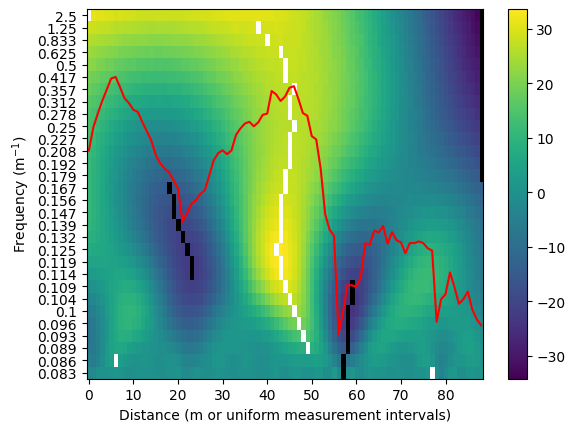

In [447]:
waveletPlot(x[nextSegments3[1][0]:],y[nextSegments3[1][0]:],[contWav[0][:,nextSegments3[1][0]:], contWav[1]])
plt.imshow(minMaxArray([contWav[0][:,nextSegments3[1][0]:], contWav[1]]), interpolation='nearest', aspect='auto', origin='lower', cmap='gray')
plt.show()

In [239]:
np.asarray(find_peaks(y))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

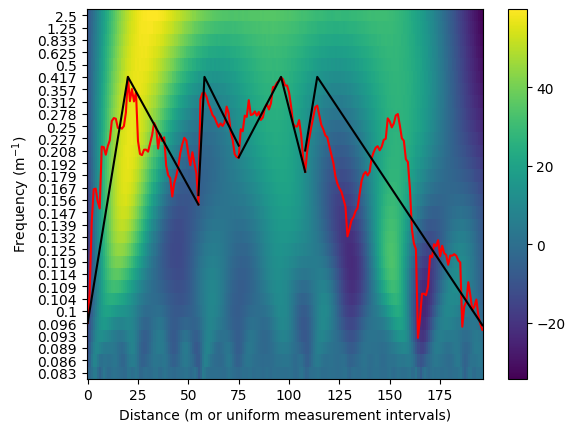

In [444]:
def segmentPlot(segmentLocations, y, contWav):
    newTestNorm = np.asarray([y[segmentLocations[0]], y[segmentLocations[1]], y[segmentLocations[2]]]) * (0.8 * contWav[0].shape[0] / np.max([y[segmentLocations[0]], y[segmentLocations[1]], y[segmentLocations[2]]]))
    plt.plot([segmentLocations[0],segmentLocations[1],segmentLocations[2]], newTestNorm, color='black')
    return None


contWav = waveletGen(x,y)
waveletPlot(x, y, contWav)


segmentPlot([firstMinimum1,peak1,secondMinimum1], y, contWav)
segmentPlot(nextSegments1[1], y, contWav)
segmentPlot(nextSegments2[1], y, contWav)
segmentPlot(nextSegments3[1], y, contWav)
plt.show()

In [349]:
data = pd.read_csv('BF1 H2.csv')
x, y = list(data.iloc[:,0]), list(data.iloc[:,3])
contWav= waveletGen(x, y)

find_peaks(contWav[0][19]*-1)

(array([94, 99], dtype=int64), {})

In [398]:
data = pd.read_csv('Linked Key&Poly Central.csv')
x, y = list(data[data['Fault No.']==1].iloc[:,2]), list(data[data['Fault No.']==1].iloc[:,9])
contWav= waveletGen(x, y)
modWav = contWav
firstMinimum1, peak1, secondMinimum1 = firstSegment(x, y, modWav)
nextSegments1 = nextSegment(x, y, firstMinimum1, secondMinimum1)
nextSegments2 = nextSegment(x, y, 0, nextSegments1[1][2])
nextSegments3 = nextSegment(x, y, 0, nextSegments2[1][2])
waveletPlot(x, y, modWav)

segmentPlot([firstMinimum1,peak1,secondMinimum1], y, modWav)
segmentPlot(nextSegments1[1], y, modWav)

TypeError: '>' not supported between instances of 'NoneType' and 'int'

In [367]:
data[['Fault No.']==1]

KeyError: False

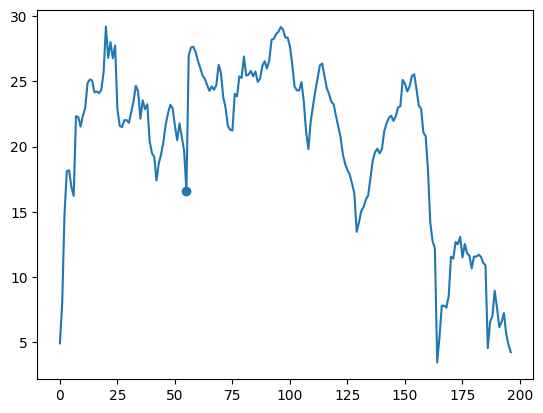

In [88]:
plt.plot(np.arange(0,len(y)),y)
plt.scatter([55], y[55])
plt.show()

c:\Users\Yoshi\Desktop\Part 3\SE Brazil\.venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 197, using nperseg = 197
  warnings.warn('nperseg = {0:d} is greater than input length '


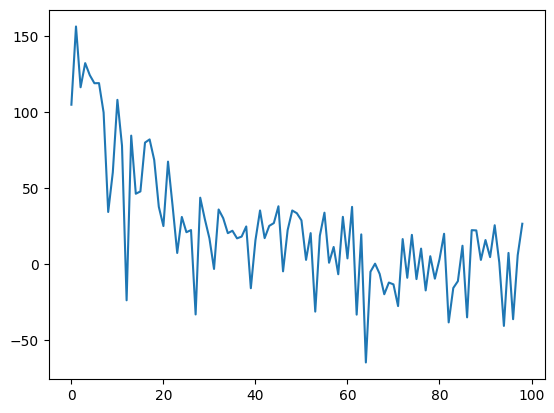

In [19]:
import algorithm as alg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal


df = pd.read_csv('R2 H3.csv')
x = np.asarray(df.iloc[:,0])
y = np.asarray(df.iloc[:,3])
contWav = alg.waveletGen(x,y)

# smoothedSignal = signal.medfilt(y, 3)
# plt.plot(smoothedSignal)
# plt.plot(y, color='red')

# contWav= alg.waveletGen(x, smoothedSignal)
# alg.waveletPlot(x, smoothedSignal, contWav)

plt.plot(20*np.log(np.abs(signal.spectrogram(y)[2])))

Segment Count: 7


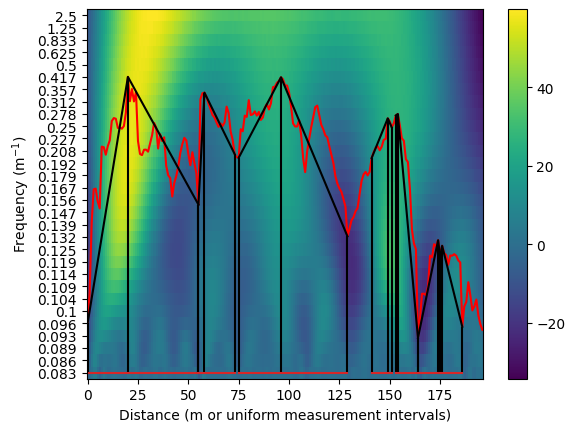

In [45]:
import numpy as np
import pandas as pd
import algorithm as alg


df = pd.read_csv('R2 H3.csv')
x = np.asarray(df.iloc[:,0])
y = np.asarray(df.iloc[:,3])


allSegments = []
ignoredRanges = []
IndexInSegment = np.full(len(y), False)
while True:
    


    allIndexInAllSegments = []
    for segment in allSegments:
        allIndexInAllSegments += list(np.arange(segment[0], segment[2]))
    for ignoredRange in ignoredRanges:
        allIndexInAllSegments += list(np.arange(ignoredRange[0], ignoredRange[-1]))

    for index, value in enumerate(IndexInSegment):
        if index in allIndexInAllSegments:
            IndexInSegment[index] = True

    # print(IndexInSegment)

    rangesToScan = []
    startPoints = []
    endPoints = []
    previous = True
    for index, value in enumerate(IndexInSegment):
        if value == False:
            if previous == True:
                startPoints.append(index)
            if index == len(IndexInSegment) - 1:
                endPoints.append(index)
        if value == True:
            if previous == False:
                endPoints.append(index)
        previous = value



    for i in np.arange(len(startPoints)):
        rangesToScan.append((startPoints[i], endPoints[i]))
    significantRangesToScan = [i for i in rangesToScan if i[1] - i[0] > int(0.1 * len(x))]

    if len(significantRangesToScan) == 0:
        break
        print("NO MORE SEGMENTS")








    for range in significantRangesToScan:
        rangeX = x[range[0]:range[1]]
        rangeY = y[range[0]:range[1]]
        contWav = alg.waveletGen(x[range[0]:range[1]], y[range[0]:range[1]])
        newSegmentRange = alg.firstSegment(x[range[0]:range[1]], y[range[0]:range[1]], contWav)
        if None in newSegmentRange:
            ignoredRanges.append(range)
        else:
            trueNewSegmentRange = [newSegmentRange[0] + range[0], newSegmentRange[1] + range[0], newSegmentRange[2] + range[0]]
            allSegments.append(trueNewSegmentRange)

alg.waveletPlot(x, y, alg.waveletGen(x,y))
for seg in allSegments:
        alg.segmentPlot(seg, y, alg.waveletGen(x,y))
print("Segment Count:", len(allSegments))

In [2]:
lower = 22
segPeak = 22
upper = 32
if lower != segPeak and upper != segPeak:
    print("ERROR")
    print(lower, segPeak, upper)

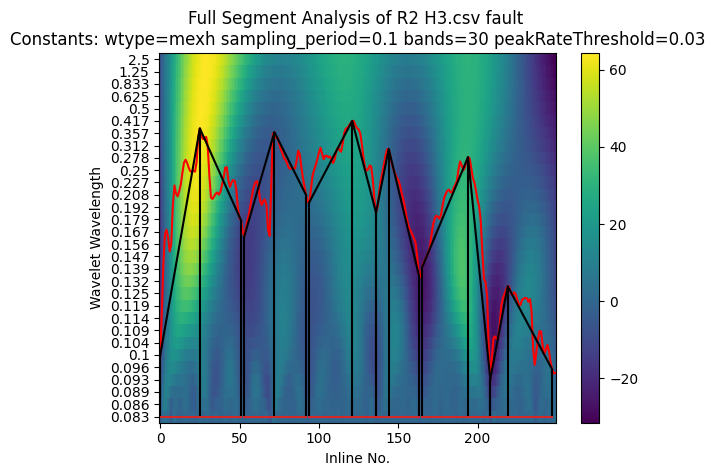

In [31]:
import algorithm as alg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import math
import scipy.special as sp
import scipy.optimize as opt
from scipy import stats

name = 'R2 H3.csv'
df = pd.read_csv(name)
x = np.asarray(df.iloc[:,0])
y = np.asarray(df.iloc[:,3])
# y = signal.resample(signal.resample(y, 40), 250)
# x = np.arange(len(y))

# df = pd.read_csv('S1 H2.csv')
# x = np.asarray(df.iloc[:,0])
# y = np.asarray(df.iloc[:,3])

y = signal.savgol_filter(y, 4, 2, mode='nearest')

allSegments = alg.newFullSegmentAnalysis(x,y, name=name, peakRateThreshold=0.03)
plt.show()
x, y = alg.resampleToPeak(x,y)

start = (x[allSegments[0][0]], y[allSegments[0][0]])
peak = (x[allSegments[0][1]], y[allSegments[0][1]])
end = (x[allSegments[0][2]], y[allSegments[0][2]])

segmentXThrow = [start[0],peak[0],end[0]]
segmentY = [start[1],peak[1],end[1]]

vals = stats.lognorm.fit(segmentY, floc=0)


segmentXThrow=x[allSegments[0][0]:allSegments[0][2]]
segmentYThrow=y[allSegments[0][0]:allSegments[0][2]]


In [ ]:


# segmentNumber = 5
# segmentXThrow=x[allSegments[segmentNumber][0]:allSegments[segmentNumber][2]]
# segmentYThrow=y[allSegments[segmentNumber][0]:allSegments[segmentNumber][2]]

# segmentXThrow = np.arange(0, len(segmentYThrow), 1)

# xWeightsStart = np.full(1000,segmentXThrow[0])
# yWeightsStart = np.full(1000,segmentYThrow[0])

# xWeightsEnd = np.full(1000,segmentXThrow[-1])
# yWeightsEnd = np.full(1000,segmentYThrow[-1])
# segmentXThrowWeighted = np.concatenate((xWeightsStart,segmentXThrow,xWeightsEnd))
# segmentYThrowWeighted = np.concatenate((yWeightsStart,segmentYThrow,yWeightsEnd))

# poly = PolynomialFeatures(degree=3, include_bias=False)

# poly_features = poly.fit_transform(np.asarray(segmentXThrowWeighted).reshape(-1,1))

# poly_reg_model = LinearRegression()
# poly_reg_model.fit(poly_features, segmentYThrowWeighted)

# # print(poly_reg_model.coef_, poly_reg_model.intercept_)

# y_predicted = poly_reg_model.predict(poly_features)


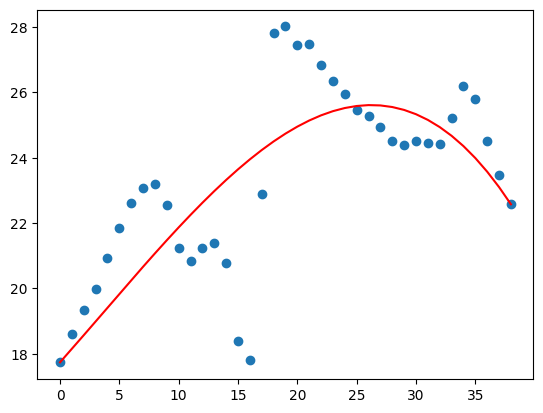

In [66]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
def polyFitSegment(y, start, end, degree=3):
    segmentYThrow = y[start:end]

    segmentXThrow = np.arange(0, len(segmentYThrow), 1)

    xWeightsStart = np.full(1000,segmentXThrow[0])
    yWeightsStart = np.full(1000,segmentYThrow[0])

    xWeightsEnd = np.full(1000,segmentXThrow[-1])
    yWeightsEnd = np.full(1000,segmentYThrow[-1])
    segmentXThrowWeighted = np.concatenate((xWeightsStart,segmentXThrow,xWeightsEnd))
    segmentYThrowWeighted = np.concatenate((yWeightsStart,segmentYThrow,yWeightsEnd))

    poly = PolynomialFeatures(degree, include_bias=False)

    poly_features = poly.fit_transform(np.asarray(segmentXThrowWeighted).reshape(-1,1))

    poly_reg_model = LinearRegression()
    return poly_reg_model.fit(poly_features, segmentYThrowWeighted), segmentXThrowWeighted, poly_features

start = allSegments[1][0]
end = allSegments[1][2]

model, x_predicted, poly_features = polyFitSegment(y, start, end, degree=3)

y_predicted = model.predict(poly_features)

plt.scatter(np.arange(len(y[start:end])), y[start:end])
plt.plot(x_predicted, y_predicted, color='red')
plt.show()

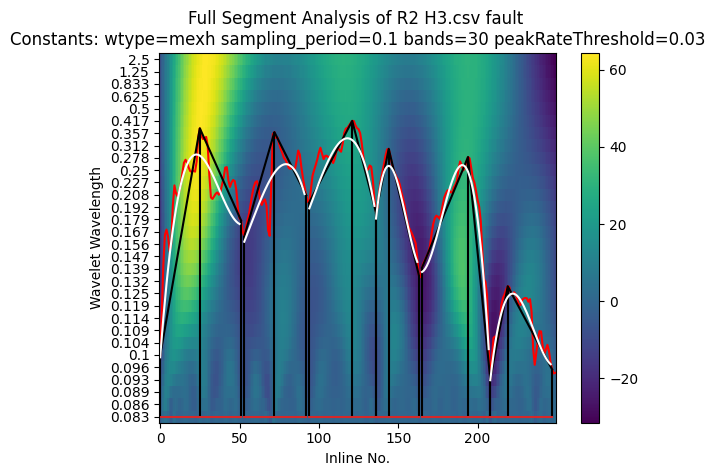

In [77]:
alg.newFullSegmentAnalysis(x,y, name=name, peakRateThreshold=0.03)

for i in allSegments:
    model, x_predicted, poly_features = polyFitSegment(y, i[0], i[2], degree=3)
    y_predicted = model.predict(poly_features)
    # plt.scatter(np.arange(len(y[i[0]:i[2]]))+i[0], y[i[0]:i[2]])
    plt.plot(x_predicted+i[0], 0.8*(y_predicted), color='white')
    # plt.show()
plt.show()

In [81]:
allSegments = [[6, 21, 51], [53, 67, 83], [88, 123, 146], [147, 153, 164], [164, 175, 184], [192, 239, 247]]

allSegments = [[allSegments[i][0], allSegments[i][1], allSegments[i+1][0]] for i in range(len(allSegments)-2)]

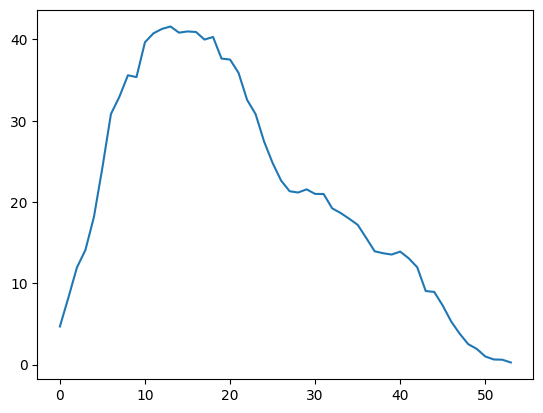

In [84]:
name = 'S3 H2.csv'
df = pd.read_csv(name)
x = np.asarray(df.iloc[:,0])
y = np.asarray(df.iloc[:,3])
plt.plot(y)
plt.show()

In [ ]:


# print(allSegments)

# thresholds = np.arange(0.005, 0.1, 0.005)
# for i in thresholds:
#     allSegments = alg.newFullSegmentAnalysis(x,y, name=name, peakRateThreshold=i)
#     print(allSegments)

# contWav=alg.waveletGen(x,y)

# alg.waveletPlot(x,y,contWav)

# peaks = signal.find_peaks(np.log(np.asarray(contWav[0][-19])-np.min(np.asarray(contWav[0])))*-1)
# plt.scatter(peaks[0],np.zeros(len(peaks[0])), color='red')
# plt.stem(peaks[0],np.full(len(peaks[0]), 29), linefmt='red' , markerfmt=' ')
# print(peaks[0])
# print(contWav[1][19])
# plt.plot(np.log(np.asarray(contWav[0][-19])-np.min(np.asarray(contWav[0]))), color='white')
# plt.show()
# print(np.asarray(contWav[0][19]).shape)
























# y = signal.savgol_filter(y, 11, 3)
# contWav = alg.waveletGen(x,y)

# firstMinimum, peak, secondMinimum = alg.firstSegment(x, y, contWav) 
# band1 = [None, None, None]
# band2 = [firstMinimum, peak, secondMinimum]

# allSegments = [[firstMinimum, peak, secondMinimum]]
# while True:
    
#     if None not in band1:
#         allSegments.append(band1)
#     if None not in band2:
#         allSegments.append(band2)
    
#     newSegment = alg.nextSegment(x, y, np.min(np.asarray(allSegments)), np.max(np.asarray(allSegments)))
#     band1 = newSegment[0]
#     band2 = newSegment[1]
#     if None in band1 and None in band2:
#         break


# alg.waveletPlot(x,y,contWav)
# for seg in allSegments:
#     alg.segmentPlot(seg, y, contWav)
# plt.show()

# # nextSegments1 = alg.nextSegment(x, y, 0, secondMinimum)
# nextSegments2 = alg.nextSegment(x, y, 0, nextSegments1[1][2])
# nextSegments3 = alg.nextSegment(x, y, 0, nextSegments2[1][2])
# # nextSegments4 = alg.nextSegment(x, y, 0, nextSegments3[1][2])
# # # nextSegments5 = alg.nextSegment(x, y, 0, nextSegments4[1][2])


# alg.segmentPlot([firstMinimum,peak,secondMinimum], y, contWav)
# alg.segmentPlot(nextSegments1[1], y, contWav)
# alg.segmentPlot(nextSegments2[1], y, contWav)
# # # alg.segmentPlot(nextSegments3[1], y, contWav)
# # # alg.segmentPlot(nextSegments4[1], y, contWav)
# # # alg.segmentPlot(nextSegments5[1], y, contWav)
# plt.show()

# # # finalWav = alg.waveletGen(x[108:], y[108:])

# # # alg.waveletPlot(x[108:], y[108:], finalWav)
# # # # plt.plot(finalWav[0][-15,:])
# # # plt.show()